# I have developed a Random Forest Model using the Land surface temperature and spectral indices from landsat 8(30m), and other spectral indices from planet data (3m)

# The code starts from importing liabraries to plotting it using matplot lib. 

In [2]:
import rasterio
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor

NDVI30m.tif
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 257, 'height': 353, 'count': 1, 'crs': CRS.from_epsg(32652), 'transform': Affine(30.0, 0.0, 401042.2189999996,
       0.0, -30.0, 4131774.4749), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}


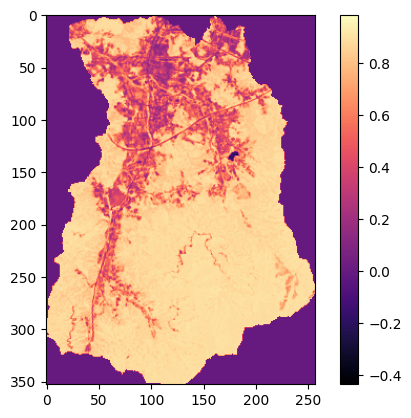

SAVI30m.tif
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 257, 'height': 353, 'count': 1, 'crs': CRS.from_epsg(32652), 'transform': Affine(30.0, 0.0, 401042.2189999996,
       0.0, -30.0, 4131774.4749), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}


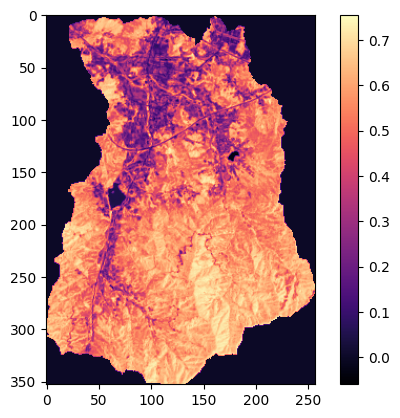

NDWI30m.tif
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 257, 'height': 353, 'count': 1, 'crs': CRS.from_epsg(32652), 'transform': Affine(30.0, 0.0, 401042.2189999996,
       0.0, -30.0, 4131774.4749), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}


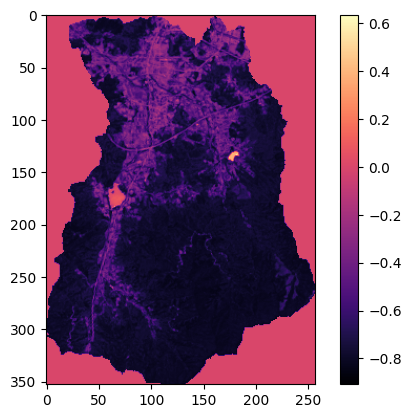

BasinLST30m.tif
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 257, 'height': 353, 'count': 1, 'crs': CRS.from_epsg(32652), 'transform': Affine(30.0, 0.0, 401042.2189999996,
       0.0, -30.0, 4131774.4749), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}


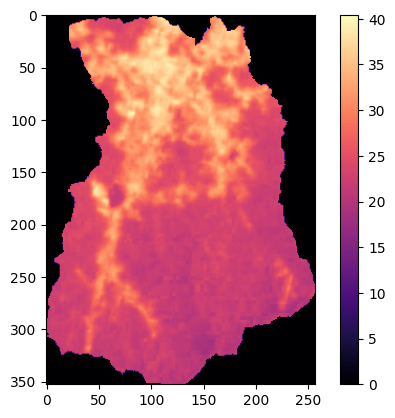

In [3]:
# Define image filenames for 30m resolution
images_30m = ['NDVI30m.tif', 'SAVI30m.tif', 'NDWI30m.tif', 'BasinLST30m.tif']

# Define arrays to store 30m image data
arrays_30m = []

# Loop through each 30m image
for image in images_30m:
    print(image)
    src = rasterio.open(image)
    profile = src.profile
    print(profile)

    # Read 30m image data
    array = src.read(1)
    
    # Handle nodata values
    array_disp = np.copy(array)
    array_disp[array_disp == -3.4028230607370965e+38] = 0
    
    # Store 30m image data in arrays list
    arrays_30m.append(array)
    
    # Display the 30m image
    pyplot.imshow(array_disp, cmap='magma')
    pyplot.colorbar()
    pyplot.show()  
    src.close()

In [4]:
# Create a DataFrame from 30m image data
values_30m = []
ny_30m = arrays_30m[0].shape[0]
nx_30m = arrays_30m[0].shape[1]

for i in range(len(arrays_30m)):
    values_30m.append([])
    for y in range(ny_30m):
        for x in range(nx_30m):
            values_30m[i].append([y, x, arrays_30m[i][y, x]]) 

values_30m = np.array(values_30m)
df_30m = pd.DataFrame(values_30m[:, :, 2].T, columns=['NDVI', 'SAVI', 'NDWI', 'BasinLST'])

df_30m["y"] = values_30m[0][:, 0]
df_30m["x"] = values_30m[0][:, 1]

df_30m = df_30m[df_30m["BasinLST"] >= 0]

print(df_30m, df_30m.describe())

           NDVI      SAVI      NDWI   BasinLST      y      x
160    0.858575  0.574456 -0.772726  28.255962    0.0  160.0
161    0.827000  0.557389 -0.753370  28.604488    0.0  161.0
417    0.884913  0.584130 -0.792703  29.539457    1.0  160.0
418    0.859134  0.574243 -0.782532  29.423969    1.0  161.0
615    0.588492  0.409103 -0.557548  32.778553    2.0  101.0
...         ...       ...       ...        ...    ...    ...
90592  0.889736  0.626645 -0.804412  20.598383  352.0  128.0
90593  0.894429  0.673444 -0.818130  20.624851  352.0  129.0
90594  0.893142  0.693418 -0.817310  20.986038  352.0  130.0
90595  0.899740  0.713149 -0.823309  20.938238  352.0  131.0
90596  0.908174  0.732605 -0.833048  21.197401  352.0  132.0

[62874 rows x 6 columns]                NDVI          SAVI          NDWI      BasinLST             y  \
count  62874.000000  62874.000000  62874.000000  62874.000000  62874.000000   
mean       0.753730      0.507721     -0.691479     26.057868    182.073178   
std  

In [5]:
x = []
y = []
for i in arrays_30m:
    sx, sy = i.shape
    x.append(sx)
    y.append(sy)
x = min(x)
y = min(y)

print(arrays_30m[0].shape)
print(arrays_30m[1].shape)
print(arrays_30m[2].shape)

(353, 257)
(353, 257)
(353, 257)


In [6]:
# Train a Random Forest regressor on 30m variables
reg = RandomForestRegressor()
X_30m = df_30m[['NDVI', 'SAVI', 'NDWI']]
y_30m = df_30m['BasinLST']
reg.fit(X_30m, y_30m)

RandomForestRegressor()

In [8]:
X_30m = df_30m[['NDVI', 'SAVI', 'NDWI']]
print(X_30m)
predicted_LST_30m = reg.predict(X_30m)

           NDVI      SAVI      NDWI
160    0.858575  0.574456 -0.772726
161    0.827000  0.557389 -0.753370
417    0.884913  0.584130 -0.792703
418    0.859134  0.574243 -0.782532
615    0.588492  0.409103 -0.557548
...         ...       ...       ...
90592  0.889736  0.626645 -0.804412
90593  0.894429  0.673444 -0.818130
90594  0.893142  0.693418 -0.817310
90595  0.899740  0.713149 -0.823309
90596  0.908174  0.732605 -0.833048

[62874 rows x 3 columns]


In [8]:
df_res = pd.DataFrame(predicted_LST_30m)
df_res, df_res.describe()

(               0
 0      27.137071
 1      27.435542
 2      26.706945
 3      27.633158
 4      31.959038
 ...          ...
 62869  21.046116
 62870  21.283750
 62871  21.531235
 62872  21.620263
 62873  21.774165
 
 [62874 rows x 1 columns],
                   0
 count  62874.000000
 mean      26.061759
 std        4.332257
 min       19.173571
 25%       22.608310
 50%       24.245449
 75%       29.463065
 max       38.650732)

In [9]:
mat = np.zeros([ny_30m, nx_30m])

for i, p in enumerate(predicted_LST_30m):
    y = int(df_30m.iloc[i]['y'])
    x = int(df_30m.iloc[i]['x'])
    mat[y][x] = p

0.0 38.65073246002197


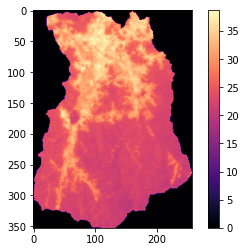

In [10]:
# display prediction
print(mat.min(), mat.max())

pyplot.imshow(mat, cmap='magma')
pyplot.colorbar()
pyplot.show()  

NDVI3m.tif
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 2570, 'height': 3534, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 52N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",129],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(3.0, 0.0, 401040.0,
       0.0, -3.0, 4131786.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


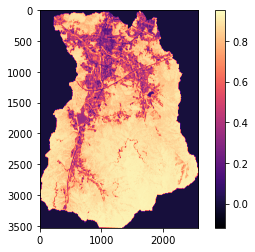

SAVI3m.tif
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 2570, 'height': 3534, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 52N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",129],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(3.0, 0.0, 401040.0,
       0.0, -3.0, 4131786.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


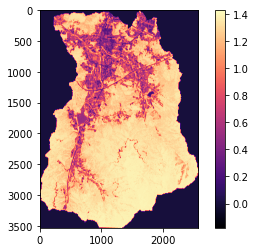

NDWI3m.tif
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 2570, 'height': 3534, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 52N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",129],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(3.0, 0.0, 401040.0,
       0.0, -3.0, 4131786.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


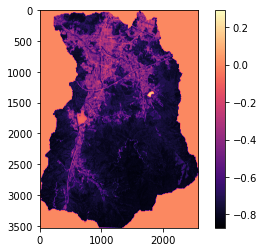

In [11]:
# Define image filenames for 3m resolution
images_3m = ['NDVI3m.tif', 'SAVI3m.tif', 'NDWI3m.tif']
# Define arrays to store 10m image data
arrays_3m = []
# Loop through each 3m image
for image in images_3m:
    print(image)
    src = rasterio.open(image)
    profile = src.profile
    print(profile)
     # Read 3m image data
    array = src.read(1)
    
    # Handle nodata values
    array_disp = np.copy(array)
    array_disp[array_disp == -3.4028234663852886e+38] = 0
    
    # Store 3m image data in arrays list
    arrays_3m.append(array)
    
    # Display the 3m image
    pyplot.imshow(array_disp, cmap='magma')
    pyplot.colorbar()
    pyplot.show()  
    src.close()

In [12]:
print(arrays_3m[0].shape)
print(arrays_3m[1].shape)
print(arrays_3m[2].shape)

(3534, 2570)
(3534, 2570)
(3534, 2570)


In [13]:
# Create a DataFrame from 3m image data
values_3m = []
ny_3m = arrays_3m[0].shape[0]
nx_3m = arrays_3m[0].shape[1]

for i in range(len(arrays_3m)):
    values_3m.append([])
    for y in range(ny_3m):
        for x in range(nx_3m):
            values_3m[i].append([y, x, arrays_3m[i][y, x]]) 

values_3m = np.array(values_3m)
print(values_3m.shape)

df_3m = pd.DataFrame(values_3m[:, :, 2].T, columns=['NDVI', 'SAVI', 'NDWI'])
df_3m["y"] = values_3m[0][:, 0]
df_3m["x"] = values_3m[0][:, 1]

df_3m = df_3m[df_3m["NDVI"] != -3.4028234663852886e+38]
df_3m


(3, 9082380, 3)


,NDVI,SAVI,NDWI,y,x
1605,0.838198,1.257296,-0.742296,0.0,1605.0
1606,0.837973,1.256960,-0.740618,0.0,1606.0
1607,0.843686,1.265528,-0.746797,0.0,1607.0
1608,0.837302,1.255952,-0.747536,0.0,1608.0
1609,0.833117,1.249676,-0.749897,0.0,1609.0
...,...,...,...,...,...
9081135,0.936988,1.405483,-0.847400,3533.0,1325.0
9081136,0.935976,1.403963,-0.844322,3533.0,1326.0
9081137,0.933740,1.400611,-0.846894,3533.0,1327.0
9081138,0.930511,1.395767,-0.851033,3533.0,1328.0


In [14]:
 # Predict the BasinLST3m using the trained Random Forest model
X_3m = df_3m[['NDVI', 'SAVI', 'NDWI']]
print(X_3m)
predicted_LST_3m = reg.predict(X_3m)

# Reshape the predicted LST values to match the image shape
# predicted_LST_3m = predicted_LST_3m.reshape(arrays_3m[0].shape)

# # Create a new raster file with predicted LST values
# create_raster_with_predicted_values(predicted_LST_3m, 'predicted_LST_3m.tif', images_3m[0])

             NDVI      SAVI      NDWI
1605     0.838198  1.257296 -0.742296
1606     0.837973  1.256960 -0.740618
1607     0.843686  1.265528 -0.746797
1608     0.837302  1.255952 -0.747536
1609     0.833117  1.249676 -0.749897
...           ...       ...       ...
9081135  0.936988  1.405483 -0.847400
9081136  0.935976  1.403963 -0.844322
9081137  0.933740  1.400611 -0.846894
9081138  0.930511  1.395767 -0.851033
9081139  0.927879  1.391818 -0.851302

[6287222 rows x 3 columns]


In [19]:
mat = np.full([ny_3m, nx_3m], -3.4028234663852886e+38)
yx = df_3m[['y', 'x']].to_numpy().astype(int)

mat[yx[:, 0], yx[:, 1]] = predicted_LST_3m
mat_disp = mat.copy()
mat_disp[mat_disp == -3.4028234663852886e+38] = 0

-3.4028234663852886e+38 37.28208379745483
0.0 37.28208379745483


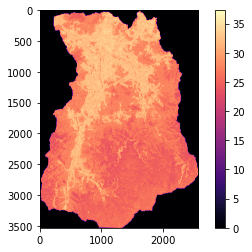

In [24]:
# display prediction
print(mat.min(), mat.max())
print(mat_disp.min(), mat_disp.max())

pyplot.imshow(mat_disp, cmap='magma')
pyplot.colorbar()
pyplot.show()  

In [21]:
profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 2570, 'height': 3534, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 52N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",129],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(3.0, 0.0, 401040.0,
       0.0, -3.0, 4131786.0), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}

In [22]:
with rasterio.open('lst_pred_3m.tif', 'w', **profile) as dst:
    dst.write(mat, indexes=1)